In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')
print(data)

     POS            Player  Runs  BF      SR  4s  6s Against  \
0      1     Andre Russell    88  36  244.44   1  11     CSK   
1      2       Chris Gayle   104  63  165.07   1  11     SRH   
2      3      Shreyas Iyer    93  40  232.50   3  10     KKR   
3      4      Sanju Samson    92  45  204.44   2  10     RCB   
4      5    AB de Villiers    68  30  226.66   2   8     CSK   
..   ...               ...   ...  ..     ...  ..  ..     ...   
145  146  Brendon McCullum    43  27  159.25   6   2     KKR   
146  147        Chris Lynn    27  17  158.82   2   2    PBKS   
147  148      Shubman Gill    57  36  158.33   6   2     CSK   
148  149       Jos Buttler    95  60  158.33  11   2     CSK   
149  150    Mayank Agarwal    30  19  157.89   1   2     CSK   

                      Venue     Match Date  
0               Chidambaram  10 April 2018  
1         IS Bindra Stadium  19 April 2018  
2      Arun Jaitley Stadium  27 April 2018  
3    M. Chinnaswamy Stadium  15 April 2018  
4    M

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import SimpleRNN

# Assuming your dataset is named 'data'
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset
# Assuming 'Pos', 'Player', 'Runs', 'BF', 'SR', '4s', '6s', 'Against', 'Venue', 'Match Date' are your features, and you want to predict 'Runs'
X = data[['POS', 'BF', 'SR', '4s', '6s']]  # Features
y = data['Runs']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Create ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
3/3 [==============================] - 1s 84ms/step - loss: 3328.4326 - val_loss: 3437.9705
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 3310.9724 - val_loss: 3419.7871
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 3294.2219 - val_loss: 3400.9812
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 3275.7932 - val_loss: 3381.4045
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 3257.1360 - val_loss: 3360.4482
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 3238.6575 - val_loss: 3338.4375
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 3218.4844 - val_loss: 3315.7288
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 3198.0481 - val_loss: 3291.9021
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 3177.2000 - val_loss: 3266.2410
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 3

In [43]:
#CNN Model
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
3/3 [==============================] - 1s 89ms/step - loss: 3316.0012 - val_loss: 3423.6492
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 3302.1042 - val_loss: 3406.6614
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 3286.9626 - val_loss: 3389.3879
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 3272.4133 - val_loss: 3371.5674
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 3256.9414 - val_loss: 3353.3469
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 3241.1750 - val_loss: 3334.4558
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 3224.3535 - val_loss: 3314.6497
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 3207.8250 - val_loss: 3293.3721
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 3189.5137 - val_loss: 3270.5247
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 3

In [44]:
# Reshape the data for RNN
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
3/3 [==============================] - 2s 165ms/step - loss: 3327.0076 - val_loss: 3436.5906
Epoch 2/50
3/3 [==============================] - 0s 92ms/step - loss: 3318.9131 - val_loss: 3428.4670
Epoch 3/50
3/3 [==============================] - 0s 94ms/step - loss: 3311.0137 - val_loss: 3420.3896
Epoch 4/50
3/3 [==============================] - 0s 49ms/step - loss: 3303.6924 - val_loss: 3412.4121
Epoch 5/50
3/3 [==============================] - 0s 39ms/step - loss: 3295.9021 - val_loss: 3404.4421
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 3288.0710 - val_loss: 3396.5461
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 3280.9297 - val_loss: 3388.6257
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 3274.1133 - val_loss: 3380.6260
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 3266.1484 - val_loss: 3372.7051
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Preprocess the data
X = data[['POS', 'BF', 'SR', '4s', '6s']]  # Features
y = data['Runs']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Artificial Neural Network (ANN) model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Convolutional Neural Network (CNN) model
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Recurrent Neural Network (RNN) model
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1)
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the models
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
3/3 [==============================] - 1s 117ms/step - loss: 3367.2568 - val_loss: 3479.1687
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 3351.0391 - val_loss: 3463.2571
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 3335.6455 - val_loss: 3447.2805
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 3320.6758 - val_loss: 3431.6628
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 3305.6982 - val_loss: 3416.4717
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 3290.9587 - val_loss: 3401.4592
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 3275.1309 - val_loss: 3386.2097
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 3259.5771 - val_loss: 3370.4187
Epoch 9/50
3/3 [==============================] - 0s 20ms/step - loss: 3244.2034 - val_loss: 3353.8105
Epoch 10/50
3/3 [==============================] - 0s 24ms/step - loss: 

In [46]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Let's create performance categories based on the 'Runs' column
bins = [0, 50, 100, np.inf]
labels = ['Low', 'Medium', 'High']
data['Performance'] = pd.cut(data['Runs'], bins=bins, labels=labels)

# Encode the performance categories
label_encoder = LabelEncoder()
data['Performance'] = label_encoder.fit_transform(data['Performance'])

# Split the data into features (X) and target variable (y)
X = np.array(data[['Runs', 'BF', 'SR', '4s', '6s']])  # Features
y = np.array(data['Performance'])  # Target variable

# Reshape for CNN
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], X_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories: Low, Medium, High
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_cnn, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4/4 [==============================] - 1s 79ms/step - loss: 25.8328 - accuracy: 0.0333 - val_loss: 13.4904 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 6.7842 - accuracy: 0.2083 - val_loss: 1.8154 - val_accuracy: 0.1667
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 1.4497 - accuracy: 0.5167 - val_loss: 0.4503 - val_accuracy: 0.8667
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 1.9028 - accuracy: 0.6167 - val_loss: 0.3404 - val_accuracy: 0.9333
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 1.4961 - accuracy: 0.6583 - val_loss: 1.1265 - val_accuracy: 0.3000
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 1.4798 - accuracy: 0.7250 - val_loss: 0.1635 - val_accuracy: 0.9667
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 1.4640 - accuracy: 0.7583 - val_loss: 0.1654 - val_accuracy: 0.9667
Epoch 8/10
4/4 [=====

In [47]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')
print(data.head(5))

   POS          Player  Runs  BF      SR  4s  6s Against  \
0    1   Andre Russell    88  36  244.44   1  11     CSK   
1    2     Chris Gayle   104  63  165.07   1  11     SRH   
2    3    Shreyas Iyer    93  40  232.50   3  10     KKR   
3    4    Sanju Samson    92  45  204.44   2  10     RCB   
4    5  AB de Villiers    68  30  226.66   2   8     CSK   

                    Venue     Match Date  
0             Chidambaram  10 April 2018  
1       IS Bindra Stadium  19 April 2018  
2    Arun Jaitley Stadium  27 April 2018  
3  M. Chinnaswamy Stadium  15 April 2018  
4  M. Chinnaswamy Stadium  25 April 2018  


In [48]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')
num_players = len(data['Player'].unique())
print("Number of unique players:", num_players)

Number of unique players: 61


In [49]:
data.drop('Venue',axis=1,inplace=True)

In [50]:
data.isnull().sum()

POS           0
Player        0
Runs          0
BF            0
SR            0
4s            0
6s            0
Against       0
Match Date    0
dtype: int64

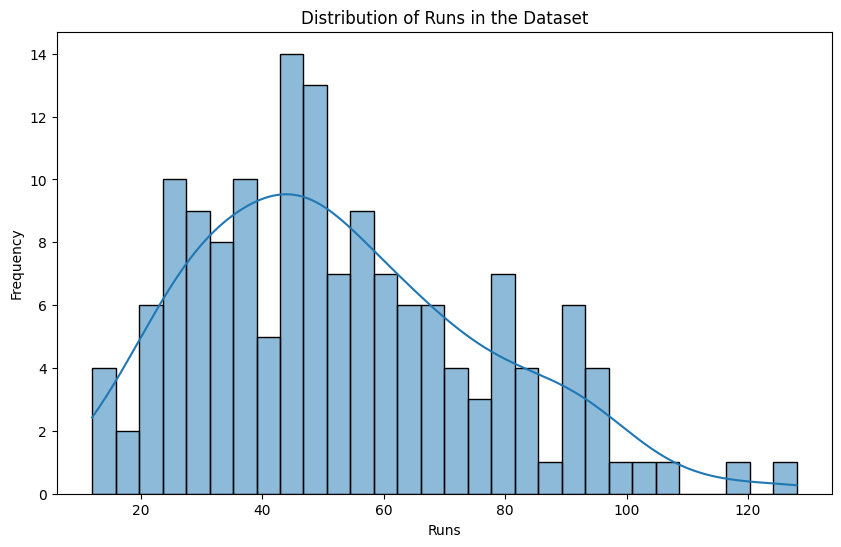

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Runs', kde=True, bins=30)
plt.title('Distribution of Runs in the Dataset')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

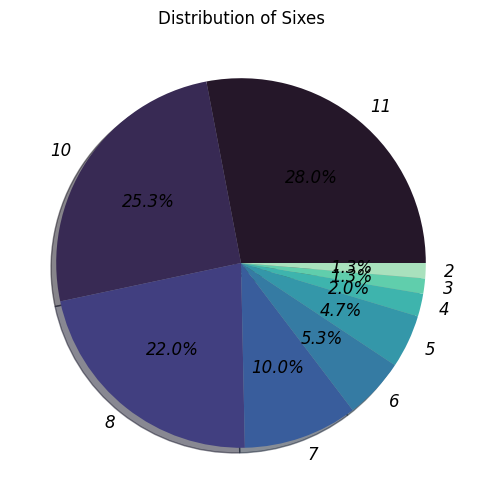

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Most Sixes Innings - 2018.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(data['6s'].value_counts(), labels=data['6s'].unique(), autopct='%1.1f%%',
        colors=sns.color_palette('mako', len(data['6s'].unique())), shadow=True, textprops={'fontsize': 12, 'style': 'italic'})
plt.title('Distribution of Sixes')
plt.show()


<Axes: ylabel='BF'>

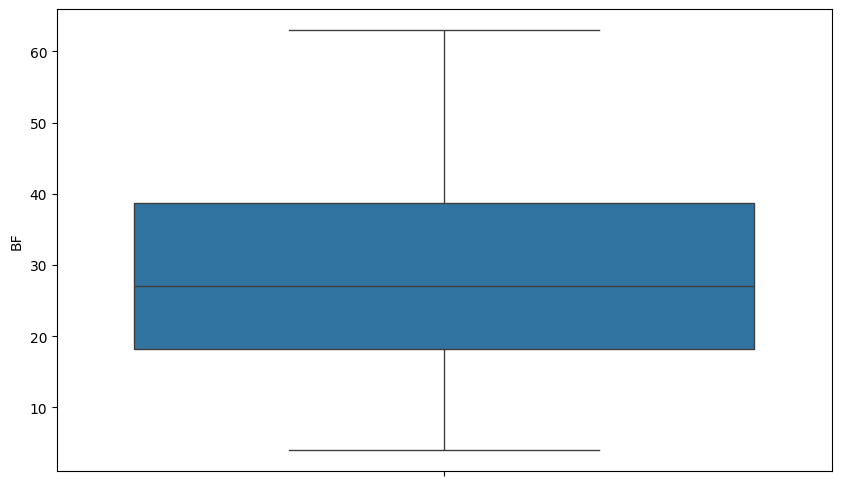

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data.BF)